In [93]:
#importing the libraries 
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
import matplotlib.pyplot as plt

In [16]:
#importing the data 
data=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
print(data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [19]:
#knowing in detail about the data set 
print(data.info())
print(data.describe())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000

In [21]:
#checking the missing the values 
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [27]:
categorical_columns=data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [33]:
# Initialize LabelEncoder
encoder = LabelEncoder()
data_encoded = data.copy()
for col in categorical_columns:
    data_encoded[col + "_encoded"] = encoder.fit_transform(data[col])
print(data_encoded.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  name_encoded  fuel_encoded  \
0  Individual       Manual   First Owner           775             4   
1  Individual       Manual   First Owner          1041             4   
2  Individual       Manual   First Owner           505             1   
3  Individual       Manual   First Owner           118             4   
4  Individual       Manual  Second Owner           279             1   

   seller_type_encoded  transmission_encoded  owner_encoded  
0                    1                     1              0  
1               

In [75]:
#splitting the data into training and testing 
X=data_encoded.drop(['selling_price','name'],axis=1)
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=non_numeric_cols, errors='ignore')
Y=data_encoded['selling_price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)
print(X_train,X_test,Y_train,Y_test)

      year  km_driven  name_encoded  fuel_encoded  seller_type_encoded  \
2990  2009     120000          1219             4                    1   
2348  2014     135000          1413             1                    0   
1739  2010      70000           943             4                    1   
2988  2014     100000          1271             1                    1   
350   2013      80000           928             1                    0   
...    ...        ...           ...           ...                  ...   
3444  2006      50000          1401             1                    1   
466   2011      80000          1236             1                    1   
3092  2016      51000           859             1                    0   
3772  2013      80000           883             1                    1   
860   2013      80000           474             4                    1   

      transmission_encoded  owner_encoded  
2990                     1              2  
2348                   

In [77]:
model = LinearRegression()
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Model score:", score)


Model score: 0.44092530652091855


In [91]:
#printing the accuracy of the model
y_pred=model.predict(X_test)
r2_score=r2_score(Y_test,y_pred)
print(f"R Square error is :{r2_score}")

R Square error is :0.44092530652091855


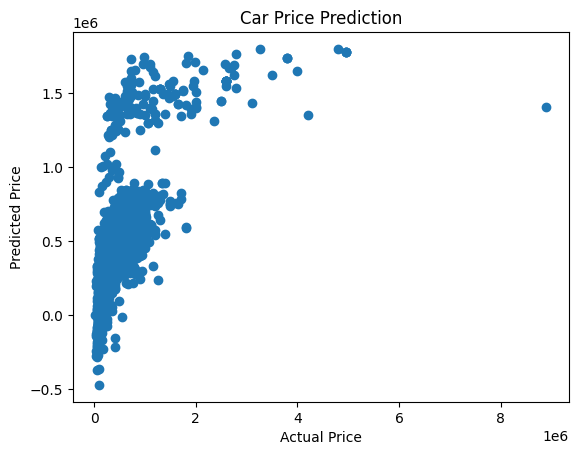

In [105]:
#visualizing the actual prices and the predicted prices 
plt.scatter(Y_test,y_pred)
plt.title('Car Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
